# Road Rage: A traffic simulation

Given an endless loop of 1KM of road and 30 vehicles, what is the optimum speed limit?


### First, import all our libraries

In [2]:
%matplotlib inline

In [3]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

All of the novel code for this problem is contained in the traffic_simulation module.

In [4]:
from traffic_simulation import *

We call our simulator tron. ![Yes, that Tron.](https://upload.wikimedia.org/wikipedia/en/1/17/Tron_poster.jpg "Yes, that Tron.")

This first graph shows traffic congestion over 120 ticks (or seconds) when cars have a maximum speed of 33m/s. (~120KM/h). The graph starts from the top and works to the right and down. Once a car reaches the rightmost edge of the graph, it wraps around to the leftmost edge. Note how the cars bunch up in the middle.

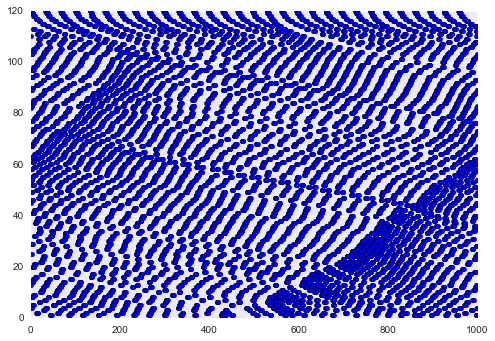

In [5]:
tron.plot_traffic(tron.get_location(33, 120))

The next graphs show congestions over the same time frame but at lower speeds (30, 27, 25, 20, 15, 10, and 5, repsectively). The bunches reflect traffic jams. 

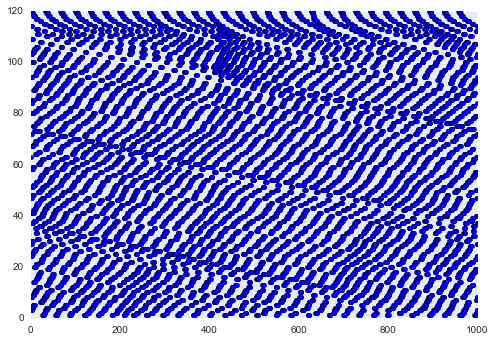

In [6]:
tron.plot_traffic(tron.get_location(30, 120))

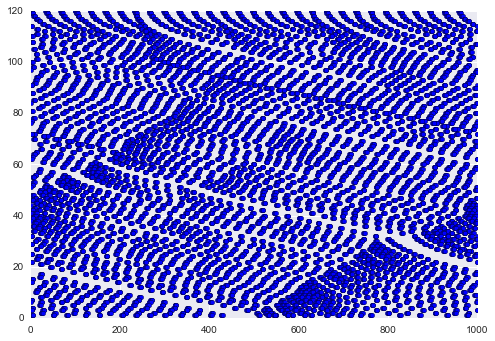

In [7]:
tron.plot_traffic(tron.get_location(27, 120))

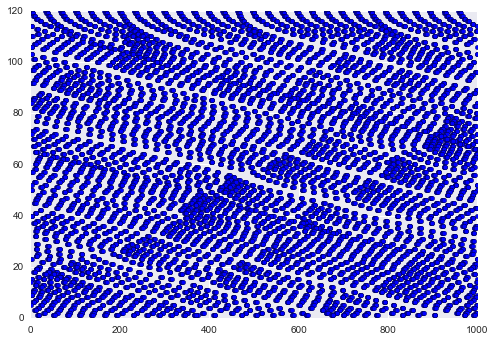

In [8]:
tron.plot_traffic(tron.get_location(25, 120))

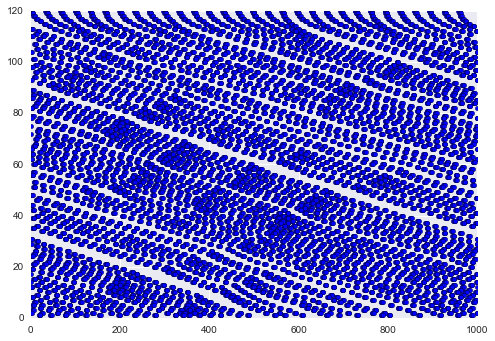

In [9]:
tron.plot_traffic(tron.get_location(20, 120))

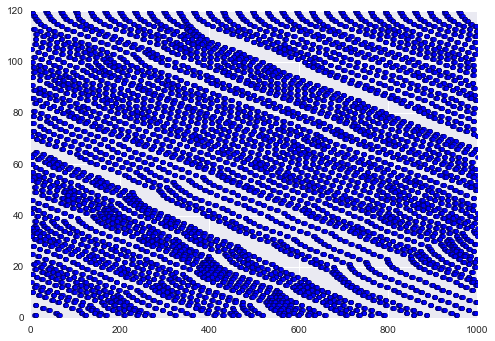

In [10]:
tron.plot_traffic(tron.get_location(15, 120))

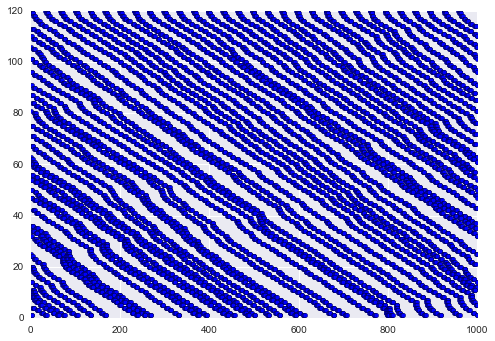

In [11]:
tron.plot_traffic(tron.get_location(10, 120))

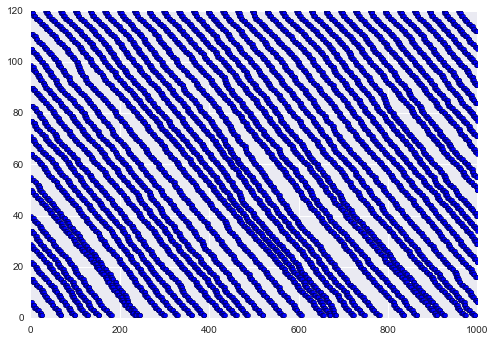

In [12]:
tron.plot_traffic(tron.get_location(5, 120))

## Crunching the numbers

Congestion is a real problem! Let's attempt to find the optimum speed limit for the road, so that congestion might be lowered. We test for congestion in this simulation by finding the average speed of all the cars on the road during the simulation.

Below, we create data by running many simulations. We simulate a range of 12 speed limits, over 3600 ticks (or seconds) 100 times for each speed limit. Then we average the vehicles speeds for each speed limit. We also find the standard deviation of the car speed distribution.

In [13]:
tronss = Simulation(range(20,33), 3600, 100)

In [14]:
speeds_list, average_speeds_list = tronss.full_monte()

Now that we've collected our data on average speeds, let's print out a list to see what speed limit is best, over an hour of driving.

In [15]:
avg_speeds_by_max_speed = []
for i, speed in enumerate(average_speeds_list):
    avg_speed = i + 20, st.mean(speed), st.stdev(speed)
    print(avg_speed)
    avg_speeds_by_max_speed.append(avg_speed)
    
    

(20, 16.692999999999998, 0.15585217030859388)
(21, 18.567999999999998, 0.1692287913990518)
(22, 18.5669, 0.2034187351700473)
(23, 20.4203, 0.23898968744920918)
(24, 20.4075, 0.2110262322723663)
(25, 22.279899999999998, 0.2847380330667954)
(26, 22.299400000000002, 0.2565065222554701)
(27, 24.203200000000002, 0.34534093825720064)
(28, 24.191300000000002, 0.2691837831127818)
(29, 26.005300000000002, 0.37964218932989)
(30, 26.0399, 0.3346655046460572)
(31, 27.9096, 0.35516938625012845)
(32, 27.956300000000002, 0.30539146925700034)


And our winner is 31 m/s.

At a speed limit of 31 m/s, the cars drive on average at a speed of 27.95 m/s. The standard deviation of the average speed over 100 trials is 0.3416.

# Take Aways

When stuck in an endless loop, always leave enough space ahead of you. Never hit your brakes. Just go with the flow, and you will do well. On average.

### P.S. What if you want to go fast?

![I wanna go fast!](http://www.outforabrick.com/wp-content/uploads/2015/06/98ab7fa96fde508dc7eac47f7702a244.600x336x1-2.jpg)

In the above section, we treated the driver's desire as an absolute speed limit. No one would go above 33.33 m/s (120km/h). But if you treat the 33.33 m/s attribute as a desired speed, rather than a max, then perhaps a speed limit higher than 33 m/s is better. A quick run of the simulation proves this supposition to be true.

In [16]:
holodeck = Simulation(range(30, 41), 3600, 200)

In [17]:
speeds_list, average_speeds_list = holodeck.full_monte()
avg_speeds_by_max_speed = []
for i, speed in enumerate(average_speeds_list):
    avg_speed = i + 30, st.mean(speed), st.stdev(speed)
    print(avg_speed)
    avg_speeds_by_max_speed.append(avg_speed)

(30, 26.038400000000003, 0.3730715102480943)
(31, 27.9822, 0.3679935546737294)
(32, 27.9272, 0.38890150669488)
(33, 29.86625, 0.3922918582000527)
(34, 29.875100000000003, 0.4250497931221305)
(35, 31.6968, 0.4703807502983689)
(36, 31.7526, 0.43861847983671565)
(37, 33.49395, 0.5401841278303158)
(38, 33.557449999999996, 0.555072540417582)
(39, 35.3573, 0.5801011088443221)
(40, 35.38045, 0.556553733065321)
